In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris= load_iris()

In [4]:
X= iris.data
Y= iris.target

In [5]:
print iris.DESCR

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_data = DataFrame(X,columns=['sepal length','sepal width','petal length','petal width'])

In [7]:
iris_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_target=DataFrame(Y,columns=['Species'])

In [9]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [10]:
def flower(num):
    if num==0:
        return 'Setosa'
    elif num==1:
        return 'Versicolour'
    elif num==2:
        return 'Virginica'

In [11]:
iris_target['Species']= iris_target['Species'].apply(flower)

In [12]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [13]:
iris =pd.concat([iris_data,iris_target],axis=1)

In [14]:
iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


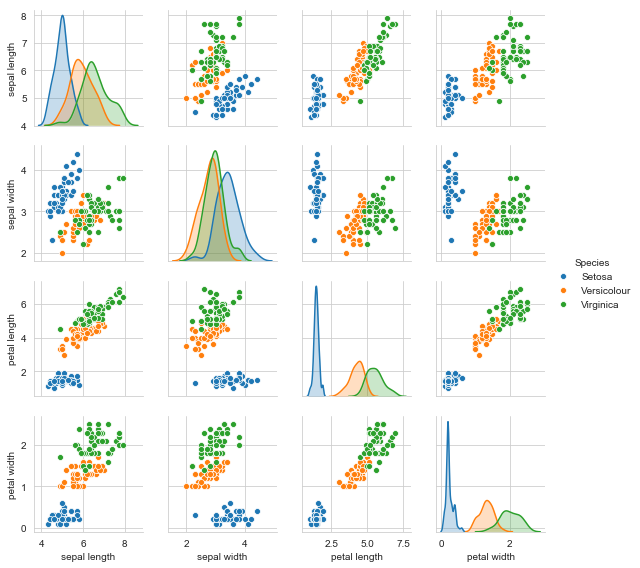

In [15]:
#visualise the matching caraters along X and Y axis.ignore the diagonal as they would be same information
sns.pairplot(iris,hue='Species',size=2)

SETOSA is really distinct from the other two species in terms of sepal and petal!!! Thus challenge would be to differentiate 
virginica and versicolour from each other.

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


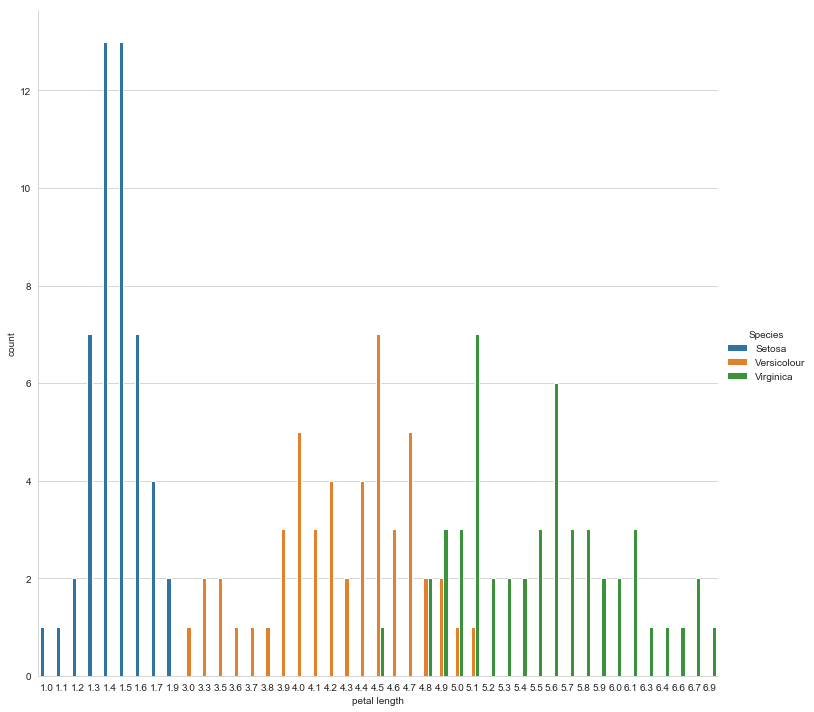

In [16]:
sns.factorplot('petal length',data=iris,hue='Species',size=10,kind='count')

USING LOGARITHMIC REGRESSION 

In [17]:
log = LogisticRegression(solver='liblinear')
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

log.fit(X_train,Y_train)

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
Y_pred = log.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [19]:
Y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [20]:
cm = metrics.confusion_matrix(Y_test,Y_pred)
print(cm)

[[22  0  0]
 [ 0 16  4]
 [ 0  0 18]]


NameError: name 'score' is not defined

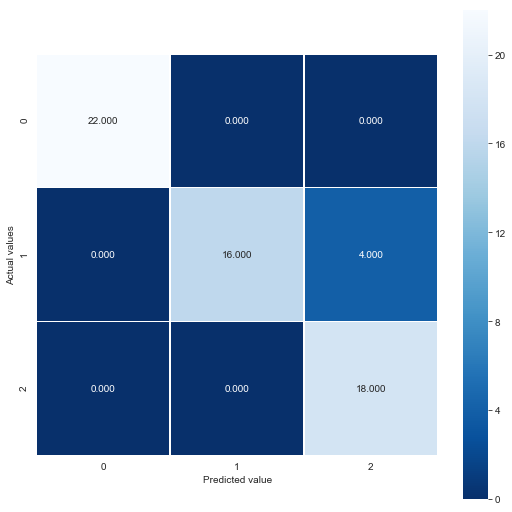

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score:{0}' .format(score*100)
plt.title(all_sampl_title,size=15);

In [ ]:
score= metrics.accuracy_score(Y_test,Y_pred)
print(score)

 USING KNN ALGORITHM 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn =  KNeighborsClassifier(n_neighbors = 6)

In [24]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [25]:
Y_pred = knn.predict(X_test)

In [26]:
sc =  metrics.accuracy_score(Y_test,Y_pred)
print(sc)

0.95


In [27]:
knn =  KNeighborsClassifier(n_neighbors = 1)

In [28]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
Y_pred = knn.predict(X_test)

In [30]:
sc1 =  metrics.accuracy_score(Y_test,Y_pred)
print(sc1)

0.9666666666666667


now how to know the best value of k?.here since datset is small we go through all k values and find th one with highest accuracy

In [31]:
k_range = range(1,21)
acc = []

In [32]:
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    acc.append(metrics.accuracy_score(Y_test,Y_pred))

In [33]:
print(acc)

[0.9666666666666667, 0.9666666666666667, 0.95, 0.95, 0.9333333333333333, 0.95, 0.95, 0.95, 0.95, 0.9333333333333333, 0.9333333333333333, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.9666666666666667, 0.95, 0.95, 0.95]


Text(0,0.5,'testing accuracy')

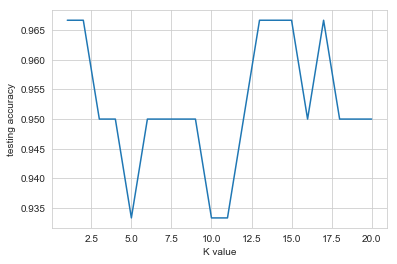

In [34]:
plt.plot(k_range,acc)
plt.xlabel('K value')
plt.ylabel('testing accuracy')

USING THE RANDOM FOREST ALGORITHM 

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [37]:
#Here we are assigning random value and if it is less than 0.75 true is printed else false
iris['is_train']=np.random.uniform(0,1,len(iris)) <= 0.75

In [38]:
iris.head()

,sepal length,sepal width,petal length,petal width,Species,is_train
0,5.1,3.5,1.4,0.2,Setosa,False
1,4.9,3.0,1.4,0.2,Setosa,False
2,4.7,3.2,1.3,0.2,Setosa,True
3,4.6,3.1,1.5,0.2,Setosa,True
4,5.0,3.6,1.4,0.2,Setosa,True


In [83]:
train,test = iris[iris['is_train']==True] , iris[iris['is_train']==False]

In [84]:
print ('no of observation in train:' ,len(train))
print ('no of observation in test:' ,len(test))

('no of observation in train:', 107)
('no of observation in test:', 43)


In [85]:
features = iris.columns[:4]
features

Index([u'sepal length', u'sepal width', u'petal length', u'petal width'], dtype='object')

In [91]:
y= pd.factorize(train['Species'])[0]
y

array([0, 0, ..., 2, 2], dtype=int64)

In [92]:
clf= RandomForestClassifier(n_jobs=2)

In [93]:
clf.fit(train[features], y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
m=clf.predict(test[features])[0:44]
m

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [105]:
clf.predict_proba(test[features])[10:20]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [106]:
pd.crosstab(test['Species'],m,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
Setosa,13,0,0
Versicolour,0,12,1
Virginica,0,0,17
